In [1]:
# # EXAMPLE COMMAND: from folder examples/open_deep_research, run: python run_gaia.py --concurrency 32 --run-name generate-traces-03-apr-noplanning --model-id gpt-4o
# import argparse
# import json
# import os
# import threading
# from datetime import datetime
# from pathlib import Path
# from typing import Any
# import shutil

# import datasets
# import pandas as pd
# from dotenv import load_dotenv
# from huggingface_hub import login, snapshot_download
# from tools.reformulator import prepare_response
# from tools.run_agents import (
#     get_single_file_description,
#     get_zip_description,
# )
# from tools.text_inspector_tool import TextInspectorTool
# from tools.text_web_browser import (
#     ArchiveSearchTool,
#     FinderTool,
#     FindNextTool,
#     PageDownTool,
#     PageUpTool,
#     SimpleTextBrowser,
#     VisitTool,
# )
# from tools.visual_qa import VisualQATool
# from tqdm import tqdm

# from smolagents import (
#     CodeAgent,
#     GoogleSearchTool,
#     LiteLLMModel,
#     Model,
#     ToolCallingAgent,
# )
# from tools.agent_with_tools import create_plan_and_execute_agent, PlanExecute
# from langchain.chat_models import init_chat_model
# from tools.text_inspector_tool import TextInspectorTool
# from tools.visual_qa import VisualQATool

# # load_dotenv(override=True)
# login(os.getenv("HF_TOKEN"))

# append_answer_lock = threading.Lock()
# import sys
# sys.argv = ['']  # Override sys.argv to prevent argparse from processing notebook arguments

# import argparse


# import requests
# from langchain.tools import tool
# from dotenv import load_dotenv
# import os
# from langchain.chat_models import init_chat_model
# from langchain_community.utilities import GoogleSerperAPIWrapper
# from langchain_core.tools import Tool
# from langgraph.prebuilt import create_react_agent
# from langchain_community.tools import BraveSearch
# from langchain_community.document_loaders import WebBaseLoader
# from langchain_community.utilities import SerpAPIWrapper
# from langchain.agents import Tool, initialize_agent, AgentType
# from langchain.chat_models import ChatOpenAI
# from tools.text_web_browser import (
#     ArchiveSearchTool,
#     FinderTool,
#     FindNextTool,
#     PageDownTool,
#     PageUpTool,
#     SimpleTextBrowser,
#     VisitTool,
# )
# from tools.text_inspector_tool import TextInspectorTool
# from tools.visual_qa import VisualQATool
# from langchain_community.tools.ddg_search.tool import DuckDuckGoSearchResults
# import pandas as pd

# load_dotenv()

# EXAMPLE COMMAND: from folder examples/open_deep_research, run:
# python run_gaia.py --concurrency 32 --run-name generate-traces-03-apr-noplanning --model-id gpt-4o

import os
import sys
import threading
import argparse
from datetime import datetime
from pathlib import Path
import shutil
import json
import requests

import pandas as pd
import datasets
from tqdm import tqdm
from dotenv import load_dotenv

from huggingface_hub import login, snapshot_download

from tools.reformulator import prepare_response
from tools.run_agents import get_single_file_description, get_zip_description
from tools.text_inspector_tool import TextInspectorTool
from tools.text_web_browser import (
    ArchiveSearchTool,
    FinderTool,
    FindNextTool,
    PageDownTool,
    PageUpTool,
    SimpleTextBrowser,
    VisitTool,
)
from tools.visual_qa import VisualQATool
from tools.agent_with_tools import create_plan_and_execute_agent, PlanExecute

from smolagents import (
    CodeAgent,
    GoogleSearchTool,  # make sure this is distinct from Serp/BSerp tools
    LiteLLMModel,
    Model,
    ToolCallingAgent,
)

from langchain.chat_models import init_chat_model, ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.tools import tool
from langchain_community.utilities import GoogleSerperAPIWrapper, SerpAPIWrapper
from langchain_community.tools import BraveSearch
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.tools.ddg_search.tool import DuckDuckGoSearchResults
from langgraph.prebuilt import create_react_agent

# Setup
load_dotenv()
login(os.getenv("HF_TOKEN"))

append_answer_lock = threading.Lock()


/Users/aymar/Documents/Perso_projects/basic_gaia_ai_agent/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
# Testing AI Agent on sample questions

question = "when is aymar de bergeyck born?"

config = {"recursion_limit": 50}
graph = create_plan_and_execute_agent(
    llm_name_planner="gpt-4.1-mini",
    llm_name_executor="gpt-4.1-mini",
    llm_name_replanner="gpt-4.1-mini",
    llm_name_answer="gpt-4.1-mini")

initial_state = PlanExecute(
    question=question,
    plan=[],
    intermediate_responses=[],
    response="",
    current_step=0,
    error_count=0,
    validation=None,
    agent_finished=False
)

workflow = initial_state
workflow =  graph.invoke(initial_state, config=config)


Agent executed step: {'messages': [SystemMessage(content='\n            You are a helpful agent that should solve the instruct given to you by the user. You have multiple tools available to you. \n\n ', additional_kwargs={}, response_metadata={}, id='9a2e477a-815b-47be-9a1c-35b62a337f5f'), HumanMessage(content='\n            The instruction is only a single step of a plan that solves a bigger problem. You should not return the final answer.\n\n            Your task is only to answer to the instruction given to you. You shouldn\'t add other text than the answer.\n\n            The final goal of the plan is to solve the following question: \n\n            when is aymar de bergeyck born?\n\n            You need to solve this instruction: Search the web for "Aymar de Bergeyck birth date" to find reliable sources that provide his date of birth.\n\n            ', additional_kwargs={}, response_metadata={}, id='1bbf5cc7-dfbe-4799-ac4c-852486780214'), AIMessage(content='', additional_kwargs={'

In [5]:
print("Final Response:", workflow)

Final Response: {'question': 'when is aymar de bergeyck born?', 'plan': ['Search the web for "Aymar de Bergeyck birth date" to find reliable sources that provide his date of birth.'], 'intermediate_responses': ['Aymar de Bergeyck was born on April 22, 1944.'], 'response': 'FINAL ANSWER: April 22 1944', 'current_step': 1, 'error_count': 0, 'validation': None, 'agent_finished': True}


In [2]:

def load_gaia_dataset(use_raw_dataset: bool, set_to_run: str) -> datasets.Dataset:
    if not os.path.exists("data/gaia"):
        print('gaia dataset path doesnt exist')
        if use_raw_dataset:
            print('in use raw dataset')
            snapshot_download(
                repo_id="gaia-benchmark/GAIA",
                repo_type="dataset",
                local_dir="data/gaia",
                ignore_patterns=[".gitattributes", "README.md"],
            )
        else:
            # WARNING: this dataset is gated: make sure you visit the repo to require access.
            snapshot_download(
                repo_id="smolagents/GAIA-annotated",
                repo_type="dataset",
                local_dir="data/gaia",
                ignore_patterns=[".gitattributes", "README.md"],
            )

    def preprocess_file_paths(row):
        if len(row["file_name"]) > 0:
            row["file_name"] = f"data/gaia/{set_to_run}/" + row["file_name"]
        return row
    
    eval_ds = datasets.load_dataset(
        "data/gaia/GAIA.py",
        name="2023_all",
        split=set_to_run,
    )

    eval_ds = eval_ds.rename_columns({"Question": "question", "Final answer": "true_answer", "Level": "task"})
    eval_ds = eval_ds.map(preprocess_file_paths)
    return eval_ds

def append_answer(entry: dict, jsonl_file: str) -> None:
    jsonl_path = Path(jsonl_file)
    jsonl_path.parent.mkdir(parents=True, exist_ok=True)
    with append_answer_lock, open(jsonl_file, "a", encoding="utf-8") as fp:
        fp.write(json.dumps(entry) + "\n")
    assert jsonl_path.exists(), "File not found!"
    print("Answer exported to file:", jsonl_path.resolve())

def answer_single_question(
    example: dict, answers_file: str
) -> None:
    print('\n\n')
    print('================================================================================================================')
    print('example', example)

    question = example["question"]

    document_inspection_tool = TextInspectorTool(
            model=init_chat_model("gpt-4.1-mini", model_provider="openai", temperature=0), 
            text_limit=10000)
    visual_inspection_tool = VisualQATool(model=init_chat_model("gpt-4.1-mini", model_provider="openai", temperature=0))

    if example["file_name"]:
        if ".zip" in example["file_name"]:
            prompt_use_files = "\n\nTo solve the task above, you will have to use these attached files:\n"
            prompt_use_files += get_zip_description(
                example["file_name"], example["question"], visual_inspection_tool, document_inspection_tool
            )
        else:
            prompt_use_files = "\n\nTo solve the task above, you will have to use this attached file:\n"
            prompt_use_files += get_single_file_description(
                example["file_name"], example["question"], visual_inspection_tool, document_inspection_tool
            )

    
        # if ".zip" in example["file_name"]:
        #     folder_path = example["file_name"].replace(".zip", "")
        #     os.makedirs(folder_path, exist_ok=True)
        #     shutil.unpack_archive(example["file_name"], folder_path)
        #     string_w_paths = ""
        #     for root, dirs, files in os.walk(folder_path):
        #         print('root', root)
        #         print('dirs', dirs)
        #         print('files', files)
        #         for file in files:
        #             file_path = os.path.join(root, file)
        #             string_w_paths+= file_path+"\n"
        #     prompt_use_files = f"\n\nTo solve the question above, you will have to use these attached files: {string_w_paths}\n" 

        # else:
        #     prompt_use_files = f"\n\nTo solve the question above, you will have to use these attached files: {example["file_name"]}\n" 
        question += prompt_use_files
    print(question)
    
    # CREATE AGENT
    config = {"recursion_limit": 50}
    graph = create_plan_and_execute_agent(
        llm_name_planner="gpt-4.1-mini",
        llm_name_executor="gpt-4.1-mini",
        llm_name_replanner="gpt-4.1-mini",
        llm_name_answer="gpt-4.1-mini")

    initial_state = PlanExecute(
        question=question,
        plan=[],
        intermediate_responses=[],
        response="",
        current_step=0,
        error_count=0,
        validation=None,
        agent_finished=False
    )

    start_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    try: 
        # Run Agent
        print('Question:', question)
        workflow = initial_state
        workflow =  graph.invoke(initial_state, config=config)
        # print('QUESTION')
        # print(workflow["question"])
        # print("STEPS")
        # previous_steps_with_answers = "\n".join(
        #     f"{i}. INSTRUCTION: {workflow['plan'][i]} ANSWER: {workflow['intermediate_responses'][i]}\n" for i in range(len(workflow['intermediate_responses']))
        # )
        # print(previous_steps_with_answers)
        # print("Current step: ", workflow["current_step"])
        # print("RESPONSE")
        # print(workflow["response"])
        # print('TRUE RESPONSE')
        # print(example['true_answer'])
        # response = "No response was found"
        # for event in graph.stream(initial_state, config=config):
        #     if "planner" in event:
        #         print('PLAN')
        #         for i, p in enumerate(event['planner']['plan']):
        #             print(f"Step {i}: {p}")
        #     elif "agent" in event:
        #         print('AGENT')
        #         print(event['agent']['intermediate_responses'])
        #     elif "replan" in event:
        #         if 'plan' in event['replan']:
        #             print('REPLAN')
        #             for i, p in enumerate(event['replan']['plan']):
        #                 print(f"Step {i}: {p}")
        #         else:
        #             print('REPLAN ERROR')
        #             print(event['replan'])
        #     elif 'answer' in event:
        #         response = event['answer']['response']
        #         print('RESPONSE')
        #         print(response)
        #         break
        # workflow = {}

        raised_exception = False
    except Exception as e: 
        print("Error on", question, e)
        exception = e
        raised_exception = True

    end_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    annotated_example = {
        "question": example["question"],
        "augmented_question": question,
        "response": workflow["response"].replace('FINAL ANSWER: ', ''),
        "plan": workflow["plan"],
        "intermediate_responses": workflow["intermediate_responses"],
        "current_step": workflow["current_step"],
        "plan_with_answers": "\n".join(
            f"{i}. INSTRUCTION: {workflow['plan'][i]} ANSWER: {workflow['intermediate_responses'][i]}\n" for i in range(len(workflow['intermediate_responses']))
        ),
        "agent_error": str(exception) if raised_exception else None,
        "task": example["task"],
        "task_id": example["task_id"],
        "true_answer": example["true_answer"],
        "start_time": start_time,
        "end_time": end_time,
    }
    print('-------------------------------------------------------------')
    list_print = ['question', 'augmented_question', 'plan_with_answers', 'response', 'true_answer']
    for k in list_print:
        print(k)
        print(annotated_example[k])
    print('-------------------------------------------------------------')

    append_answer(annotated_example, answers_file)


def get_examples_to_answer(answers_file: str, eval_ds: datasets.Dataset) -> list[dict]:
    print(f"Loading answers from {answers_file}...")
    try:
        done_questions = pd.read_json(answers_file, lines=True)["question"].tolist()
        print(f"Found {len(done_questions)} previous results!")
    except Exception as e:
        print("Error when loading records: ", e)
        print("No usable records! ▶️ Starting new.")
        done_questions = []
    return [line for line in eval_ds.to_list() if line["question"] not in done_questions and line["file_name"]]




Loaded evaluation dataset:
task
2    86
1    53
3    26
Name: count, dtype: int64
Loading answers from output/validation/test1.jsonl...
Found 12 previous results!


Processing tasks:   0%|          | 0/26 [00:00<?, ?it/s]




example {'task_id': '9318445f-fe6a-4e1b-acbf-c68228c9906a', 'question': 'As a comma separated list with no whitespace, using the provided image provide all the fractions that use / as the fraction line and the answers to the sample problems. Order the list by the order in which the fractions appear.', 'task': '1', 'true_answer': '3/4,1/4,3/4,3/4,2/4,1/2,5/35,7/21,30/5,30/5,3/4,1/15,1/3,4/9,1/8,32/23,103/170', 'file_name': 'data/gaia/validation/9318445f-fe6a-4e1b-acbf-c68228c9906a.png', 'file_path': '/Users/aymar/Documents/Perso_projects/Agents-course/unit4-basic-agent/tools/data/gaia/2023/validation/9318445f-fe6a-4e1b-acbf-c68228c9906a.png', 'Annotator Metadata': {'Steps': '1. Find the fractions that use / as the fraction line before the sample problems start: 3/4,1/4,3/4,3/4,2/4,1/2,5/35,7/21,30/5,30/5\n2. Solve the sample problems:\n3. Problem 1: 3/4\n4. Problem 2: 1/15\n5. Problem 3: 1/3\n6. Problem 4: 4/9\n7. Problem 5: 1/8\n8. Problem 6: 32/23\n9. Problem 7: 103/170\n10: Add th
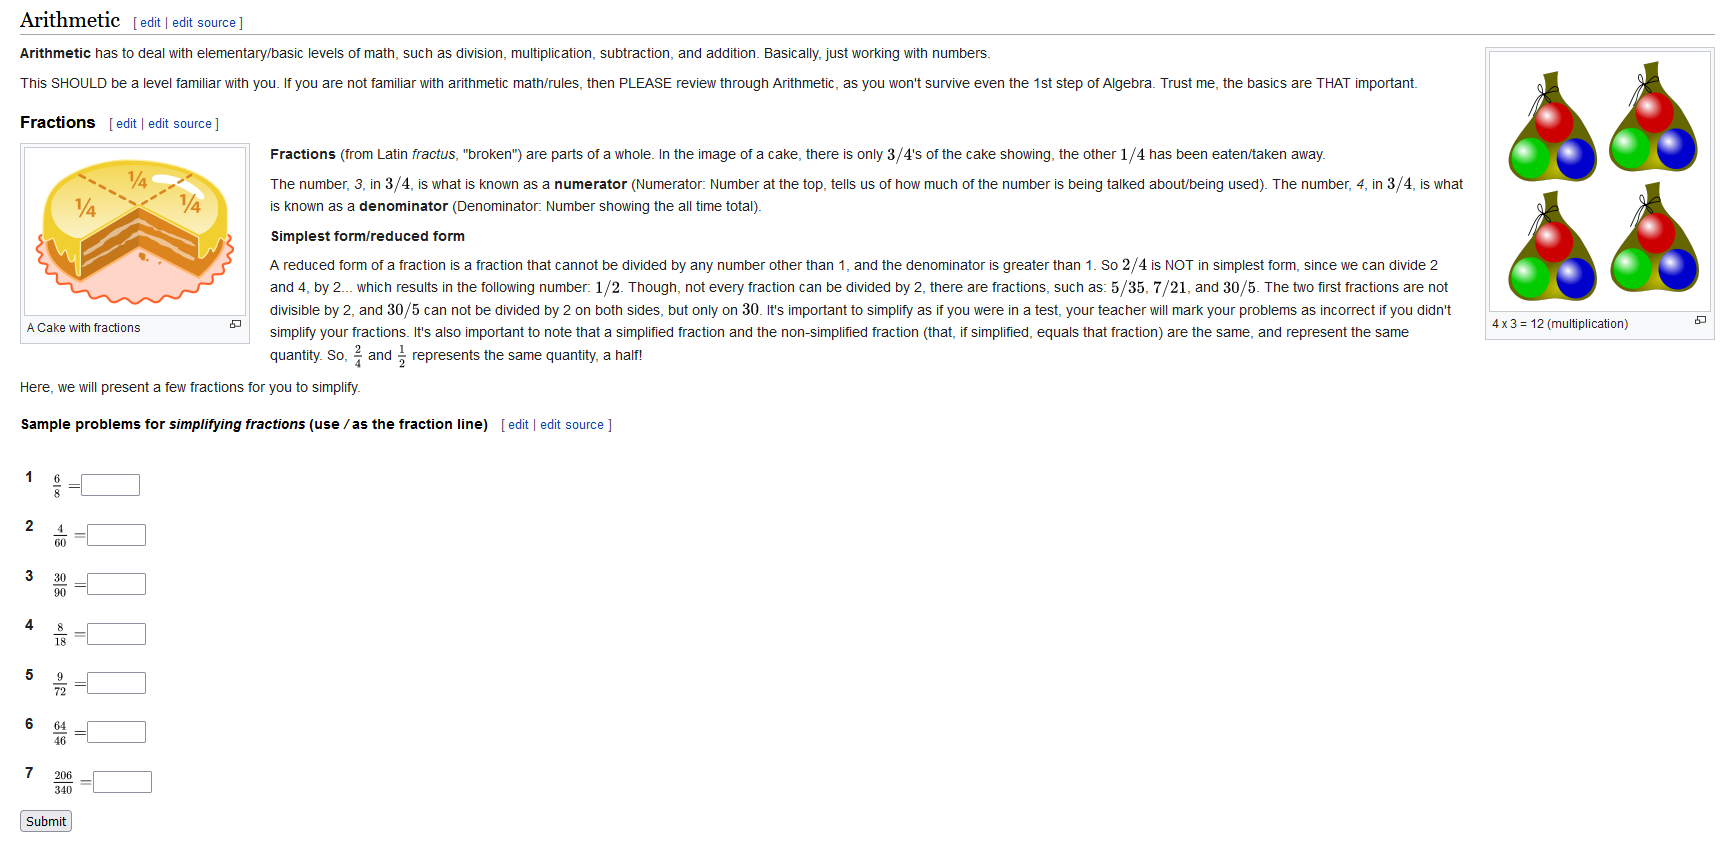

/Users/aymar/Documents/Perso_projects/basic_gaia_ai_agent/tools/agent_with_tools.py:172: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  plan = llm(messages)


image_path in _encode_image: data/gaia/validation/9318445f-fe6a-4e1b-acbf-c68228c9906a.png
base in _encode_image: iVBORw0KGgoAAAANSUhEUgAABr4AAANKCAYAAADcKj5MAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7N0HgBTl3T/w714/OI4mTSkeRZBTQbBrLKCoASxgjDFqYlQ0GjuK/zfF8iZvJGpiNBrFXqJGBQsoimIvWAGpCtyJNOlcr3v7f37PPLM7u7dlttzecXw/+LjTduaZZ56Zm93fPs94fAqIiIiIiIiIiIiIiIiIdnMZ5pWIiIiIiIiIiIiIiIhot8bAFxEREREREREREREREbULDHwRERERERERERERERFRu8DAFxEREREREREREREREbULDHwRERERERERERERERFRu8DAFxEREREREREREREREbULDHwRERERERERERERERFRu8DAFxEREREREREREREREbULDHwRERERERERERERERFRu8DAFxEREREREREREREREbULu1/ga82/cUIXD3IP/AO+rDfTInoaEzweeOyUdSb+a+bsXurx7hX9kJW1F858eouZRkRERERERERERERERE5pC3ytue0geA66DWvMeKJWP30/3isD6pc+ixdWmIkRnYc5viqUPDgenWXU24AGPX13Mxv3P7weXu92vPzcPDONiIiIiIiIiIiIiIiInNIU+FqMGU8sAZa8iP8kGfkafN7lOL4zkHPABTh3hJkYVQcUTTkHx5ix3dNEXH5xX2RmdsdZ548304iIiIiIiIiIiIiIiMgpPYGvTx7CUyUysAQP/OMTPSlhg36Ld3f5ULfkZgTFvRZPwyDpznDC02bC7sZ0yzhoGhabKQE5OOG+dWhs3IYXft7VTCMiIiIiIiIiIi
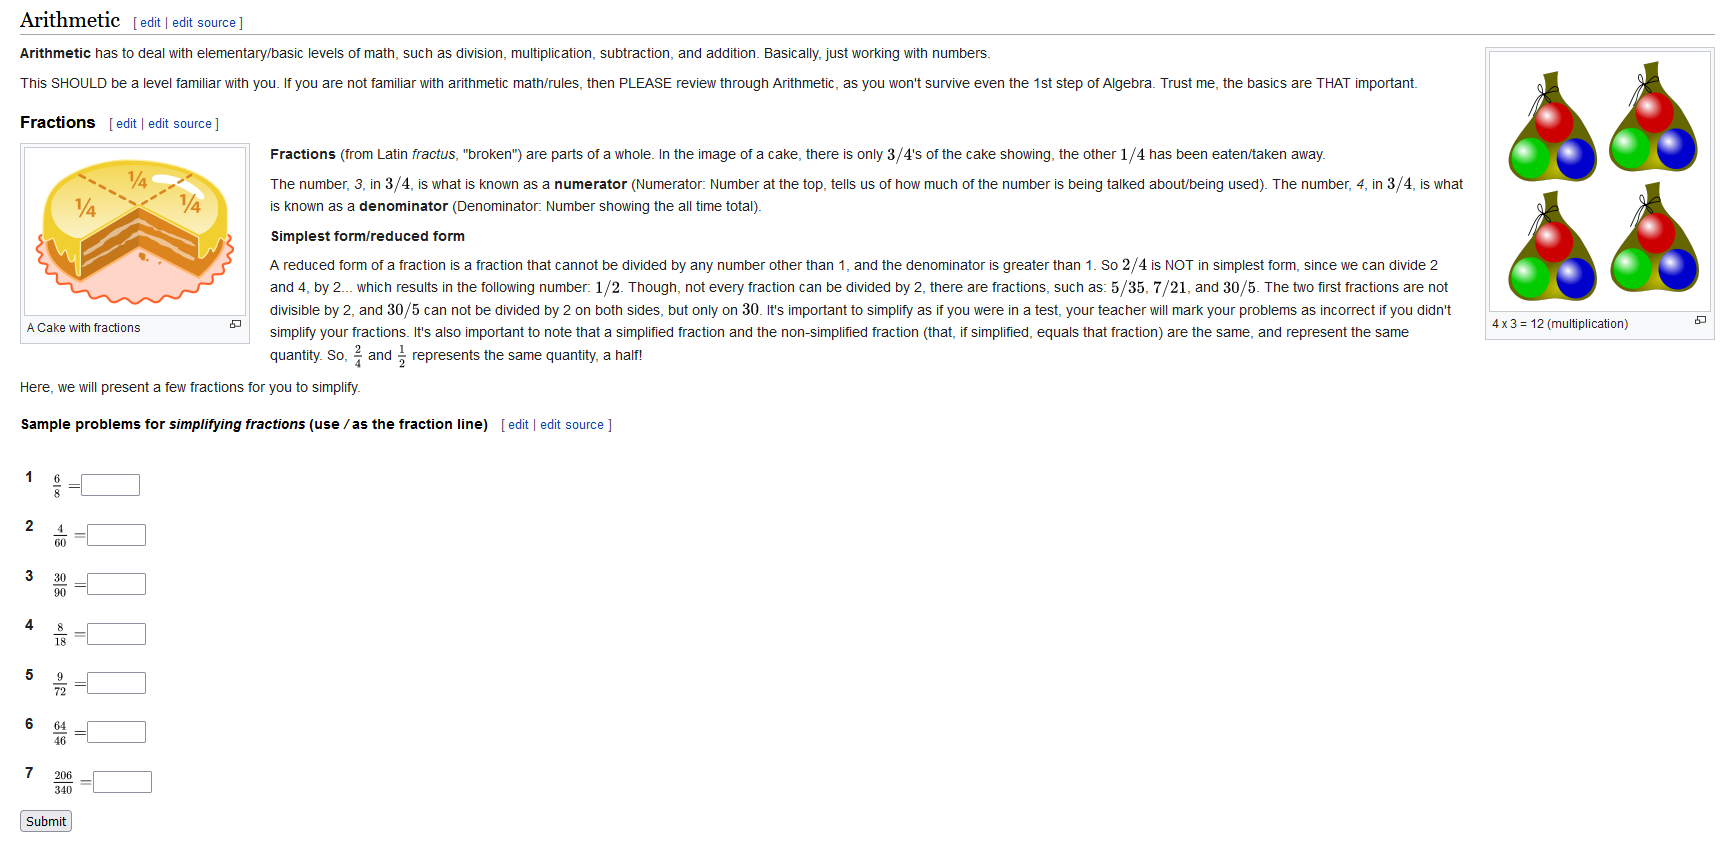

Processing tasks:   4%|▍         | 1/26 [01:12<30:04, 72.19s/it]

-------------------------------------------------------------
question
As a comma separated list with no whitespace, using the provided image provide all the fractions that use / as the fraction line and the answers to the sample problems. Order the list by the order in which the fractions appear.
augmented_question
As a comma separated list with no whitespace, using the provided image provide all the fractions that use / as the fraction line and the answers to the sample problems. Order the list by the order in which the fractions appear.

To solve the task above, you will have to use this attached file:
 - Attached image: data/gaia/validation/9318445f-fe6a-4e1b-acbf-c68228c9906a.png
     -> Summarized image description: The image shows a webpage about arithmetic, specifically focusing on fractions. There is a section explaining what fractions are, including the terms numerator and denominator, and the concept of simplest form or reduced form. An image of a cake divided into quarters 
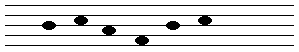
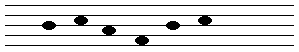

Processing tasks:   8%|▊         | 2/26 [02:39<32:26, 81.11s/it]

-------------------------------------------------------------
question
Using bass clef notes, what is the age of someone who has experienced the word spelled out in the sheet music by the note letters the total number of lines and notes minus the number of notes on lines in the image?
augmented_question
Using bass clef notes, what is the age of someone who has experienced the word spelled out in the sheet music by the note letters the total number of lines and notes minus the number of notes on lines in the image?

To solve the task above, you will have to use this attached file:
 - Attached image: data/gaia/validation/8f80e01c-1296-4371-9486-bb3d68651a60.png
     -> Summarized image description: This image shows a segment of sheet music with five horizontal staff lines and five filled-in note heads placed on the staff. The notes, from left to right, are positioned as follows: the first note is on the second line from the top, the second note is on the space just below the top line, th
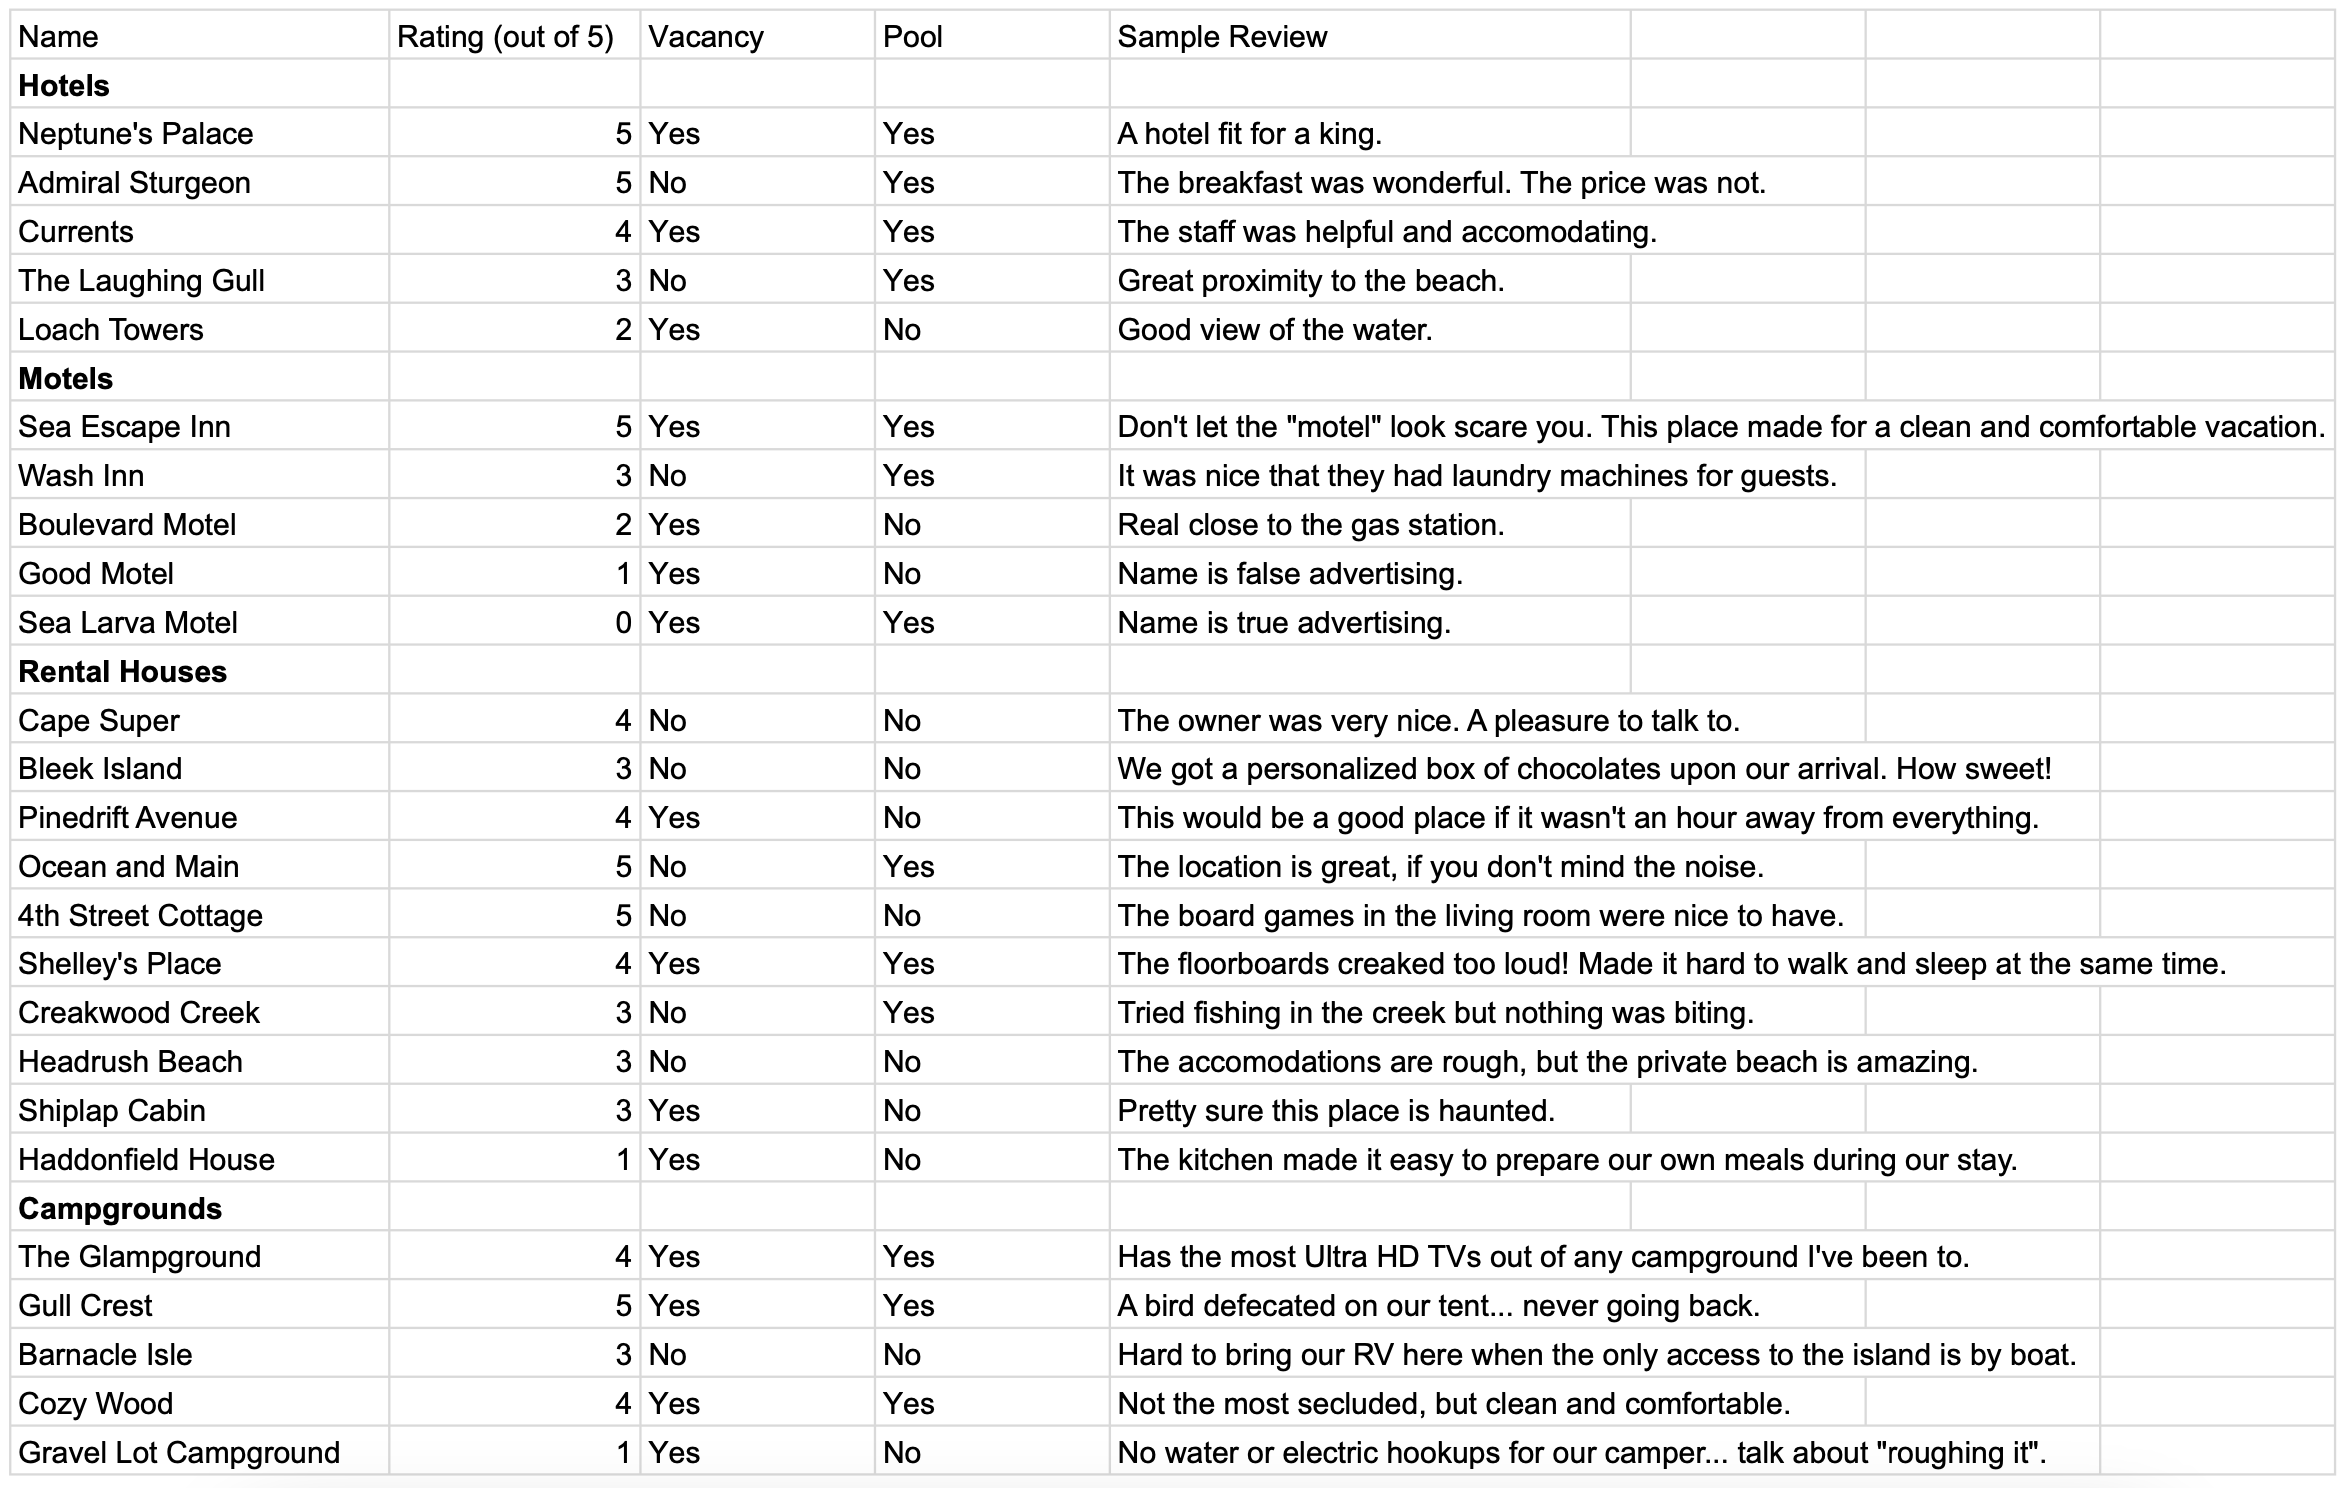
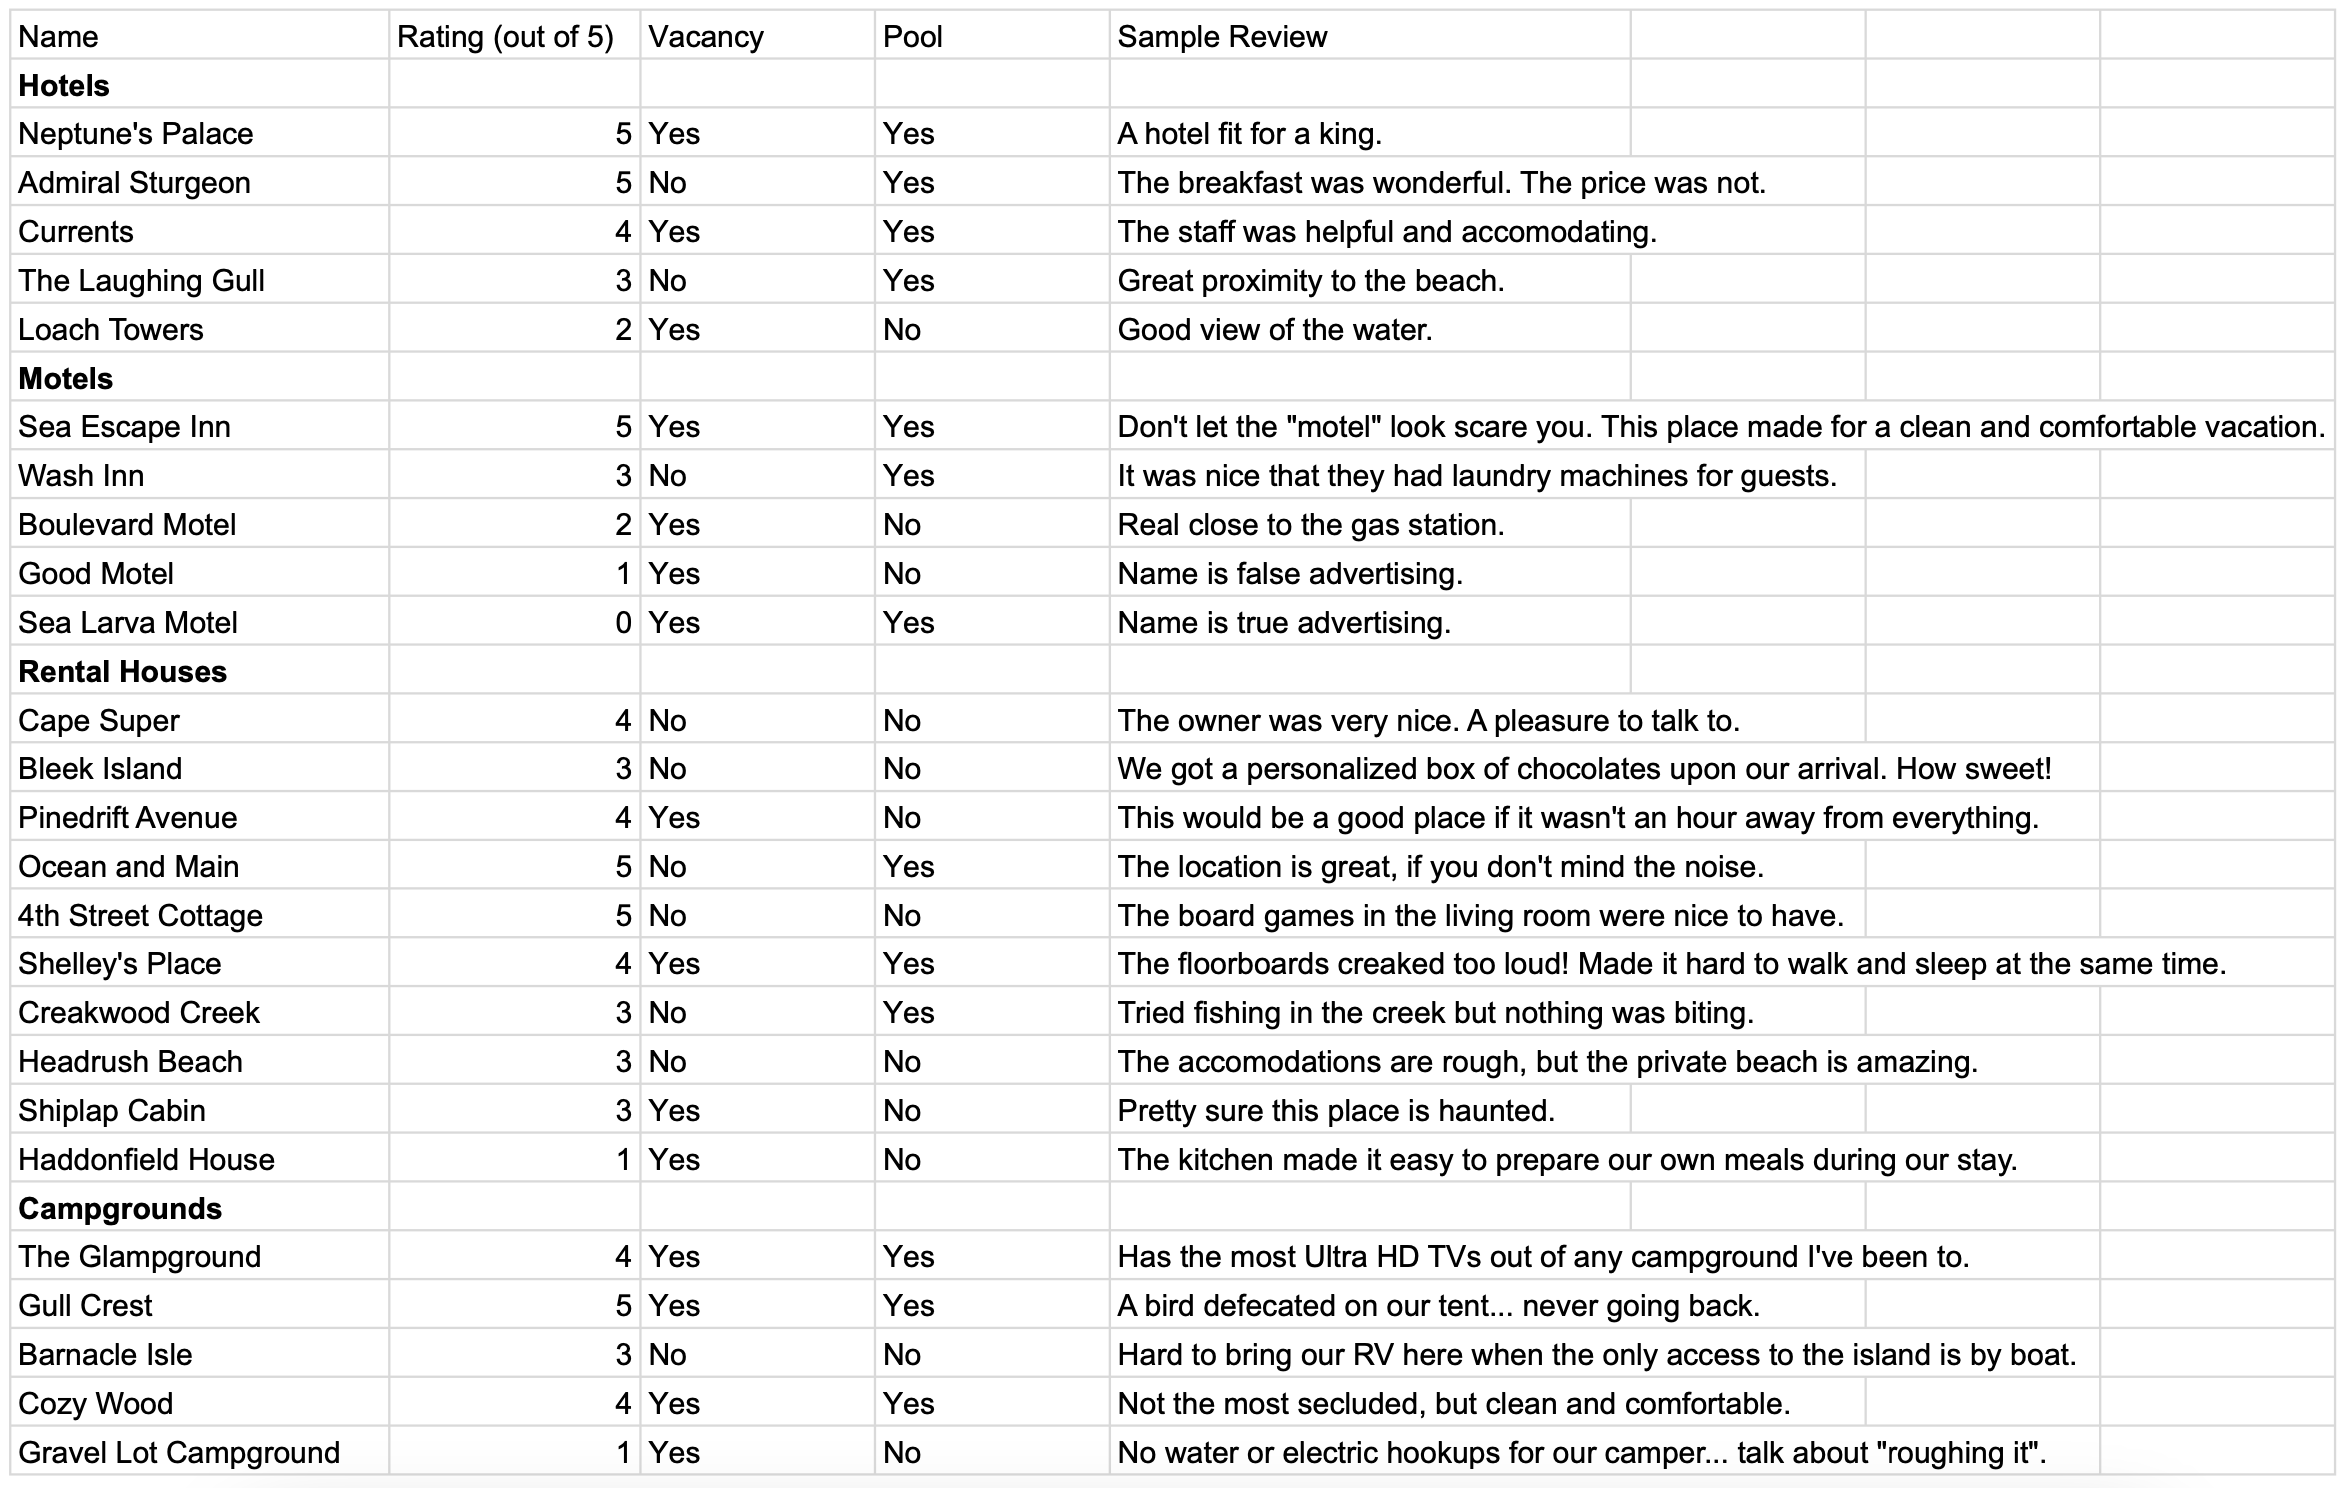

Processing tasks:  12%|█▏        | 3/26 [03:27<25:15, 65.89s/it]

-------------------------------------------------------------
question
The attached file lists accommodations in the resort town of Seahorse Island. Based on the information in this file, which seems like the better available place to stay for a family that enjoys swimming and wants a full house?
augmented_question
The attached file lists accommodations in the resort town of Seahorse Island. Based on the information in this file, which seems like the better available place to stay for a family that enjoys swimming and wants a full house?

To solve the task above, you will have to use this attached file:
 - Attached document: data/gaia/validation/366e2f2b-8632-4ef2-81eb-bc3877489217.png
     -> Summarized file description: The image is a table listing accommodations in Seahorse Island, divided into categories: Hotels, Motels, Rental Houses, and Campgrounds. Each entry includes the name, rating (out of 5), vacancy status, whether there is a pool, and a sample review. For rental houses, o
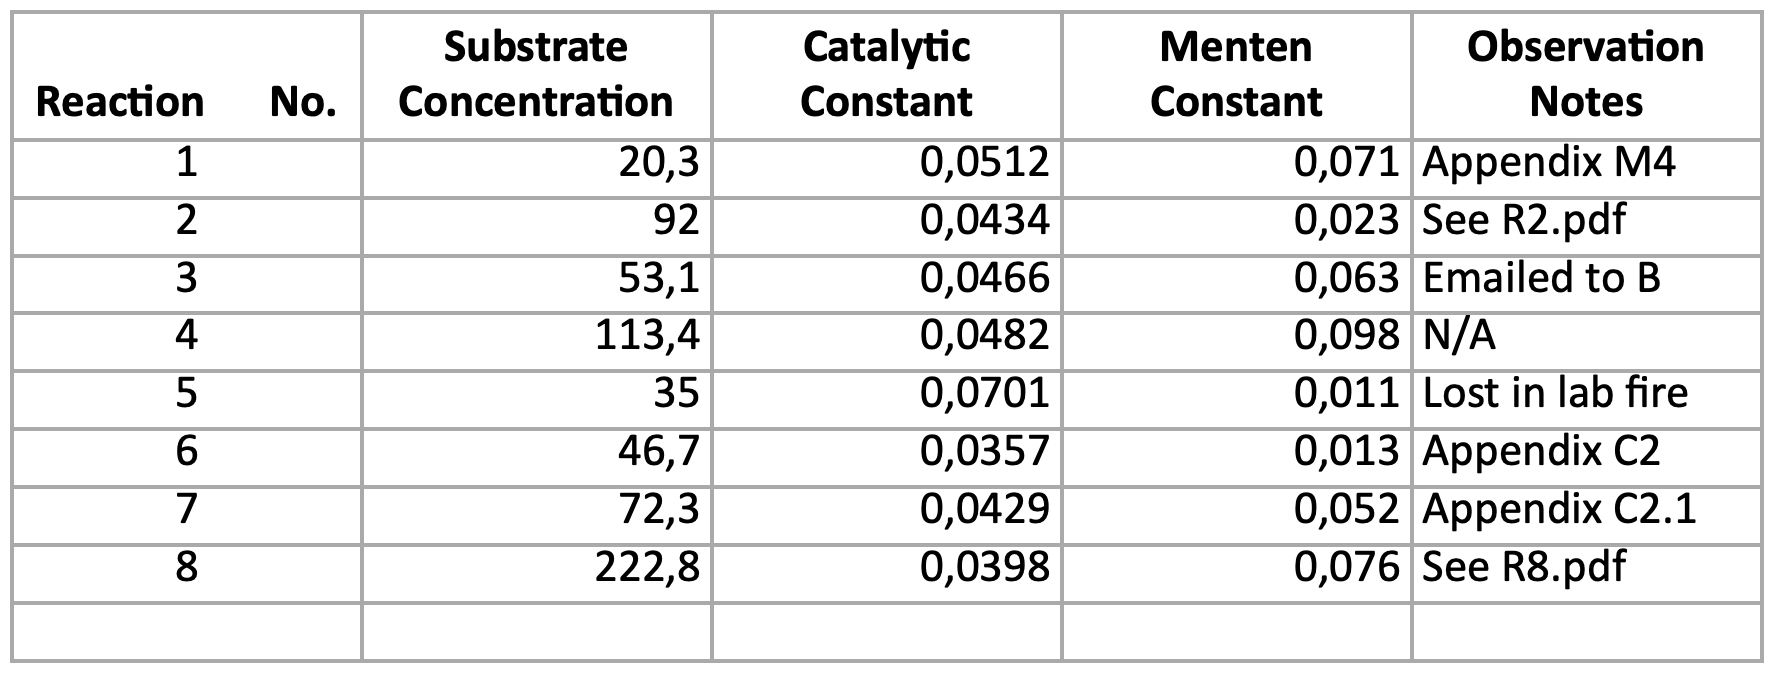
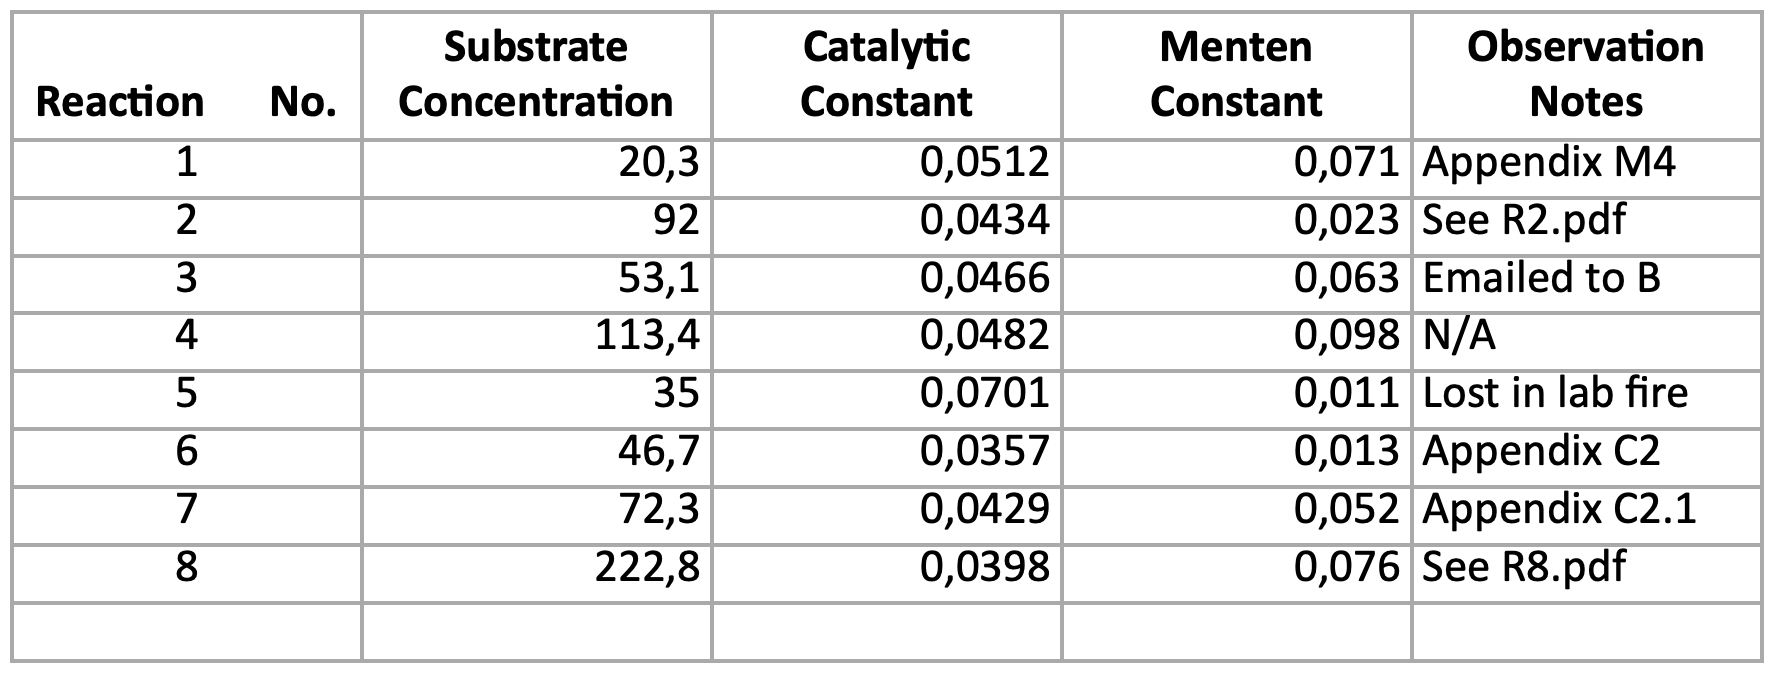

Processing tasks:  12%|█▏        | 3/26 [04:53<37:27, 97.73s/it]


KeyboardInterrupt: 

In [3]:
run_name = "test1"
set_to_run = "validation"
use_raw_dataset = True

eval_ds = load_gaia_dataset(use_raw_dataset, set_to_run)

print("Loaded evaluation dataset:")
print(pd.DataFrame(eval_ds)["task"].value_counts())

answers_file = f"output/{set_to_run}/{run_name}.jsonl"
tasks_to_run = get_examples_to_answer(answers_file, eval_ds)

for example in tqdm(tasks_to_run, desc="Processing tasks"):
    answer_single_question(example, answers_file)

print("All tasks processed.")


